**World Happiness Report up to 2022**

- *데이터 다운 링크 : https://www.kaggle.com/datasets/mathurinache/world-happiness-report <br>*
- 전 세계 행복의 상태에 대한 관심조사<br>
- GWP조사에 따른 153개국의 전국 평균 행복 점수<br>

**단계별 정리**<br>
1. 데이터/라이브러리 준비
2. 탐색적 데이터 분석(데이터 경향/데이터 품질 단서 분석)
3. 결측값
4. 이상치
5. 불균형 데이터
6. 데이터 변환
7. 마무리 작업


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/2022.csv')

In [60]:
df_2022.shape

(147, 12)

In [61]:
df_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [62]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

**데이터 형태 파악하기**
- 데이터를 보면 총 12개의 열로 구성되어 있다.
- 147개의 행으로 이루어졌다.(148개의 나라를 조사함.)
- RANK:가장 높은 행복도를 띄는 나라 순으로 정렬 했음.
- RANK, Country 빼고 결측치가 하나씩있음.
- RANK 빼고 다 dtype이 object이다.
- RANK는 Id와 같다.(삭제할 대상)

**Columns 의미파악**
0.   Country 
 - 국가이름  
1.   Happiness score
 - 행복 점수 
 - Q."가장 행복한 10을 기준으로 0에서 10까지의 척도로 자신의 행복을 어떻게 평가하시겠습니까?"
2.   Whisker-high 
 - 행복 점수의 낮은 신뢰 구간
3.   Whisker-low 
 - 행복 점수의 상위 신뢰 구간
4.   Dystopia (1.83) + residual
 - Dystopia Residual이 행복 지수 계산에 기여한 정도
 - 유토피아와 반대되는 공동체 또는 사회를 가리키는 말
5.   Explained by: GDP per capita 
 - 경제
 - 1인당 GDP
 - GDP가 행복지수 계산에 기여하는 정도
6.   Explained by: Social support 
 - 사회적 지원
7.   Explained by: Healthy life expectancy   
 - 건강
 - 기대수명
 - 기대수명이 행복지수 계산에 기여한 정도
8.   Explained by: Freedom to make life choices 
 - 자유
 - 자유가 행복지수 계산에 기여한 정도
9.   Explained by: Generosity 
 - 관대함
 - 너그러움이 행복지수 계산에 기여한 정도
10.  Explained by: Perceptions of corruption
 - 정부 부패
 - 신뢰
 - 부패에 대한 인식이 행복 지수에 기여하는 정도

In [63]:
#drop RANK
df_2022=df_2022.drop(['RANK'],axis=1)

In [64]:
df_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [65]:
df_2022['Country'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg*', 'Sweden', 'Norway', 'Israel', 'New Zealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'United States', 'United Kingdom', 'Czechia', 'Belgium', 'France',
       'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates',
       'Saudi Arabia', 'Taiwan Province of China', 'Singapore', 'Romania',
       'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania',
       'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala*',
       'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua',
       'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait*', 'Hungary',
       'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal',
       'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand',
       'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus*', 'Colombia',
       'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic',
       'Malaysia', 'Bolivia', 

**xx는 나라이름인가..?**<br>
- xx라는 나라 이름은 없다. 
- 아마 결측치 하나씩 나오는 건 여기서 나오는 듯 하다. 
- 확인 후 제거할 것이다.

In [66]:
df_2022.tail(1)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
146,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 확인해보니 결측치를 가지고 있는 원인임!!! 지우자!!

In [67]:
# drop row ['xx']
df_2022=df_2022.drop([df_2022.index[146]])

In [68]:
df_2022.tail(1)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
145,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


**나라 이름 뒤에 있는  *을 지우자**

In [69]:
df_2022['Country'] = df_2022['Country'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)

In [70]:
df_2022['Country'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands',
       'Luxembourg', 'Sweden', 'Norway', 'Israel', 'NewZealand',
       'Austria', 'Australia', 'Ireland', 'Germany', 'Canada',
       'UnitedStates', 'UnitedKingdom', 'Czechia', 'Belgium', 'France',
       'Bahrain', 'Slovenia', 'CostaRica', 'UnitedArabEmirates',
       'SaudiArabia', 'TaiwanProvinceofChina', 'Singapore', 'Romania',
       'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania',
       'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala',
       'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua',
       'Mexico', 'Croatia', 'Poland', 'ElSalvador', 'Kuwait', 'Hungary',
       'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal',
       'Argentina', 'Greece', 'SouthKorea', 'Philippines', 'Thailand',
       'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus', 'Colombia',
       'BosniaandHerzegovina', 'Mongolia', 'DominicanRepublic',
       'Malaysia', 'Bolivia', 'China', 'Paraguay'

**데이터 타입 변경하기**
- Country를 제외한 나머지는 숫자로 이루어졌으나, dtype이 object이다.
- Country를 제외한 object형 변수들을 float형으로 변경해준다.
- feature의 data를 보면 1,234이런식으로 ,가 중간에 있어서 바로 형변환이 되질 않는다. 이를 제거한 후 처리한다.

In [71]:
df_2022['Happiness score'] = df_2022['Happiness score'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)

In [72]:
df_2022.head(2)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7821,"7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,7636,"7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"


In [73]:
df_2022['Whisker-high'] = df_2022['Whisker-high'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Whisker-low'] = df_2022['Whisker-high'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Dystopia (1.83) + residual'] = df_2022['Dystopia (1.83) + residual'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: GDP per capita'] = df_2022['Explained by: GDP per capita'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: Social support'] = df_2022['Explained by: Social support'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: Healthy life expectancy'] = df_2022['Explained by: Healthy life expectancy'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: Freedom to make life choices'] = df_2022['Explained by: Freedom to make life choices'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: Generosity'] = df_2022['Explained by: Generosity'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)
df_2022['Explained by: Perceptions of corruption'] = df_2022['Explained by: Perceptions of corruption'].str.replace(pat=r'[^A-Za-z0-9]', repl= '', regex=True)

In [74]:
df_2022.head(3)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7821,7886,7886,2518,1892,1258,0775,0736,0109,0534
1,Denmark,7636,7710,7710,2226,1953,1243,0777,0719,0188,0532
2,Iceland,7557,7651,7651,2320,1936,1320,0803,0718,0270,0191


In [75]:
df_2022['Happiness score']=df_2022['Happiness score'].astype(float)
df_2022['Whisker-high']=df_2022['Whisker-high'].astype(float)
df_2022['Whisker-low']=df_2022['Whisker-low'].astype(float)
df_2022['Dystopia (1.83) + residual']=df_2022['Dystopia (1.83) + residual'].astype(float)
df_2022['Explained by: GDP per capita']=df_2022['Explained by: GDP per capita'].astype(float)
df_2022['Explained by: Social support']=df_2022['Explained by: Social support'].astype(float)
df_2022['Explained by: Healthy life expectancy']=df_2022['Explained by: Healthy life expectancy'].astype(float)
df_2022['Explained by: Perceptions of corruption']=df_2022['Explained by: Perceptions of corruption'].astype(float)
df_2022['Explained by: Generosity']=df_2022['Explained by: Generosity'].astype(float)
df_2022['Explained by: Freedom to make life choices']=df_2022['Explained by: Freedom to make life choices'].astype(float)

In [76]:
df_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7821.0,7886.0,7886.0,2518.0,1892.0,1258.0,775.0,736.0,109.0,534.0
1,Denmark,7636.0,7710.0,7710.0,2226.0,1953.0,1243.0,777.0,719.0,188.0,532.0
2,Iceland,7557.0,7651.0,7651.0,2320.0,1936.0,1320.0,803.0,718.0,270.0,191.0
3,Switzerland,7512.0,7586.0,7586.0,2153.0,2026.0,1226.0,822.0,677.0,147.0,461.0
4,Netherlands,7415.0,7471.0,7471.0,2137.0,1945.0,1206.0,787.0,651.0,271.0,419.0


In [77]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     146 non-null    object 
 1   Happiness score                             146 non-null    float64
 2   Whisker-high                                146 non-null    float64
 3   Whisker-low                                 146 non-null    float64
 4   Dystopia (1.83) + residual                  146 non-null    float64
 5   Explained by: GDP per capita                146 non-null    float64
 6   Explained by: Social support                146 non-null    float64
 7   Explained by: Healthy life expectancy       146 non-null    float64
 8   Explained by: Freedom to make life choices  146 non-null    float64
 9   Explained by: Generosity                    146 non-null    float64
 10  Explained by: 

**행복 점수의 범위는 0~10**
- 갤럽 행복 점수의 범위는 0~10이다.
- 위의 수치를 보면 1000단위이다. 천단위 뒤에 .을 찍어 범위를 바꿔주어야한다.

In [78]:
df_2022['Happiness score']=df_2022['Happiness score']*0.001
df_2022['Whisker-high']=df_2022['Whisker-high']*0.001
df_2022['Whisker-low']=df_2022['Whisker-low']*0.001
df_2022['Dystopia (1.83) + residual']=df_2022['Dystopia (1.83) + residual']*0.001
df_2022['Explained by: GDP per capita']=df_2022['Explained by: GDP per capita']*0.001
df_2022['Explained by: Social support']=df_2022['Explained by: Social support']*0.001
df_2022['Explained by: Healthy life expectancy']=df_2022['Explained by: Healthy life expectancy']*0.01
df_2022['Explained by: Perceptions of corruption']=df_2022['Explained by: Perceptions of corruption']*0.01
df_2022['Explained by: Generosity']=df_2022['Explained by: Generosity']*0.01
df_2022['Explained by: Freedom to make life choices']=df_2022['Explained by: Freedom to make life choices']*0.01
df_2022.head(3)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,7.886,7.886,2.518,1.892,1.258,7.75,7.36,1.09,5.34
1,Denmark,7.636,7.710,7.710,2.226,1.953,1.243,7.77,7.19,1.88,5.32
2,Iceland,7.557,7.651,7.651,2.320,1.936,1.320,8.03,7.18,2.70,1.91


**수치형 특징들 알아보기**


In [79]:
df_2022.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,5.673589,5.673589,1.831808,1.410445,0.905863,5.861712,5.172260,1.473767,1.547808
std,1.086843,1.065621,1.065621,0.534994,0.421663,0.280122,1.763363,1.458587,0.827987,1.275144
min,2.404000,2.469000,2.469000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,5.006250,5.006250,1.555250,1.095500,0.732000,4.632500,4.405000,0.890000,0.682500
50%,5.568500,5.680000,5.680000,1.894500,1.445500,0.957500,6.215000,5.435000,1.325000,1.195000
75%,6.305000,6.448750,6.448750,2.153000,1.784750,1.114250,7.197500,6.260000,1.977500,1.985000
max,7.821000,7.886000,7.886000,2.844000,2.209000,1.320000,9.420000,7.400000,4.680000,5.870000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

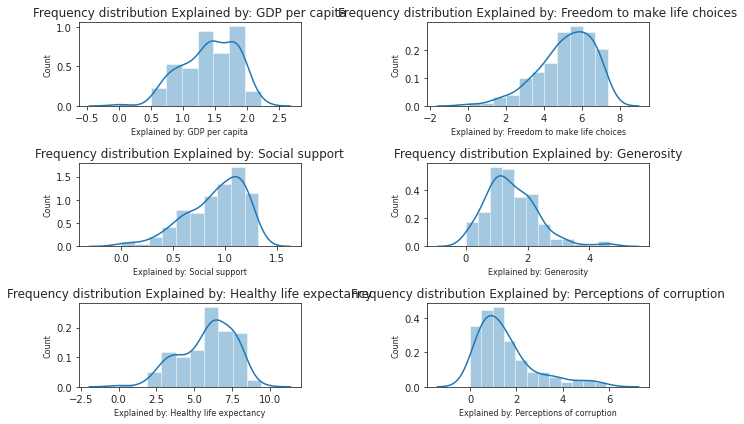

In [80]:
columns = ['Explained by: GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity','Explained by: Perceptions of corruption']

cols = int(len(columns)/2)
rows = 2
fig, axes = plt.subplots(cols, rows, figsize=(10,6))

for i, col in enumerate(columns):
    ax_col = int(i%cols)
    ax_row = int(i/cols)
    
    sns.distplot(df_2022[col], hist=True, ax=axes[ax_col, ax_row])
    axes[ax_col, ax_row].set_title('Frequency distribution '+ col, fontsize=12)
    axes[ax_col, ax_row].set_xlabel(col, fontsize=8)
    axes[ax_col, ax_row].set_ylabel('Count', fontsize=8)
fig.tight_layout()
plt.show()

**histogram 분석**
- GDP per capita : 0.5~2.2 사이에 분포해 있다. 
- Freedom to make life choices : 0~7.3 사이에 분포해있다.
- Social support : 0~1.4 사이에 분포있다.
- Generosity : 0~4.2 사이에 분포해 있다.
- Healthy life expectancy : 2.5~9 사이에 분포해있다. 
- Perceptions of corruption : 0~6 사이에 분포해있다.


**Happiness Score별 나라 순서**
- Happiness Score가 가장 높은 나라 순으로 나타내보자.
- 나라별 Happiness Score 차이를 알아보자.

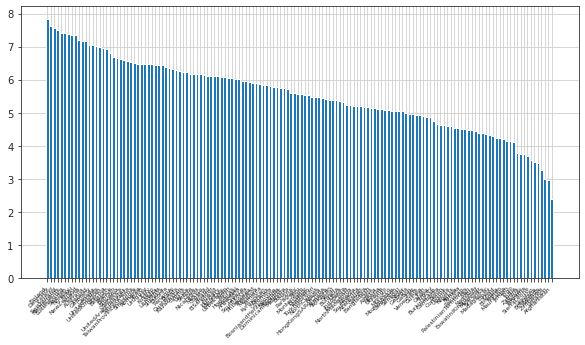

In [81]:
plt.figure(figsize=(10,5))
plt.bar(df_2022['Country'], df_2022['Happiness score'])
plt.xticks(rotation=45,ha='right',fontsize=6)
plt.grid(True)
plt.show()

In [82]:
# 행복한 나라 Top 10
df = df_2022.groupby(['Country'], sort=False)['Happiness score'].max().head(10)
df

Country
Finland        7.821
Denmark        7.636
Iceland        7.557
Switzerland    7.512
Netherlands    7.415
Luxembourg     7.404
Sweden         7.384
Norway         7.365
Israel         7.364
NewZealand     7.200
Name: Happiness score, dtype: float64

In [83]:
# 슬픈 나라 Top 10
df_2 = df_2022.groupby(['Country'], sort=False)['Happiness score'].max().tail(10)
df_2

Country
Zambia         3.760
Malawi         3.750
Tanzania       3.702
SierraLeone    3.574
Lesotho        3.512
Botswana       3.471
Rwanda         3.268
Zimbabwe       2.995
Lebanon        2.955
Afghanistan    2.404
Name: Happiness score, dtype: float64

**나라의 행복 점수 비교**
- 위의 plot을 통해 확인해본 결과 최고 행복 점수를 가진 나라는 Finland이다. 7.8점
- 최저의 행복 점수를 가진 나라는 Afghanistan이다. 2.4점
- 최고와 최저의 행복 점수 차이는 5.4점이다. 이는 상당히 큰 차이를 보이고 있다.

**행복 점수를 보며 궁금해서 찾아본 잡다한!**
1. https://edition.cnn.com/travel/article/worlds-happiest-countries-2022-wellness/index.html 이는 핀란드가 세계에서 가장 행복한 나라라고 말해주는 뉴스이다.
- **여기서 놀라운 점1**:  2021년에는 팬데믹 이전이나 2020년에 비해 세계 모든 지역에서 매우 많은 양의 낯선 사람을 돕는 것
- **여기서 놀라운 점2**: 세계에서 가장 행복한 나라는 북유럽이다.
- **여기서 놀라운 점3**: 덴마크, 노르웨이, 스웨덴, 아이슬란드는 모두 보고서가 조사 결과를 설명하는 데 사용하는 측정치에서 매우 좋은 점수를 받았다. 사람들이 서로를 돌보는 공동체의 관대함과 삶의 중요한 결정을 내릴 수 있는 자유가 큰 이유이다.
- **여기서 놀라운 점4**: 1년차에 8% 우려와 스트레스가 증가한 반면, 코로나 2년차에 접어들면서 4%로 4%가 줄어들었다.(이는 2021과 2020행복지수 분석을 통해 파악해볼 예정)
<br>
<br>

2. https://www.aljazeera.com/news/2022/3/20/afghanistan-worlds-unhappiest-country-even-before-taliban 이는 아프가니스탄이 세계에서 가장 슬픈 나라라고 말해주는 뉴스이다. 
- 아프가니스탄은 탈레반 집권 이전 지후 모두 슬픈 나라로 나왔다.
- 이는 미국의 제재와 외교적, 재정적 고립으로 인해 국가 경제는 자유 낙하 상태에 빠졌기 때문이다.
- 아프간인 중 미래에 대한 희망이 큰 사람은 거의 없다는 사실을 gallup을 통해 발견했다.



***위의 사전 자료들을 바탕으로 분석을 해보자***
- 일단, 변수 명들을 간략하게 바꿔주자.
- Dystopia (1.83) + residual > Dystopia Residual
- Explained by: GDP per capita > GDP per capita
- Explained by: Social support > Social support
- Explained by: Healthy life expectancy > life expectancy
- Explained by: Freedom to make life choices > Freedom
- Explained by: Generosity > Generosity
- Explained by: Perceptions of corruption > corruption

In [84]:
df_2022.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [85]:
df_2022.rename(columns={'Dystopia (1.83) + residual':'Dystopia Residual','Explained by: GDP per capita':'GDP per capita','Explained by: Social support':'Social support','Explained by: Healthy life expectancy':'life expectancy','Explained by: Freedom to make life choices':'Freedom','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'corruption'},inplace=True)

In [86]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            146 non-null    object 
 1   Happiness score    146 non-null    float64
 2   Whisker-high       146 non-null    float64
 3   Whisker-low        146 non-null    float64
 4   Dystopia Residual  146 non-null    float64
 5   GDP per capita     146 non-null    float64
 6   Social support     146 non-null    float64
 7   life expectancy    146 non-null    float64
 8   Freedom            146 non-null    float64
 9   Generosity         146 non-null    float64
 10  corruption         146 non-null    float64
dtypes: float64(10), object(1)
memory usage: 13.7+ KB


**두 변수간 상관관계 파악**
- y : Happiness score

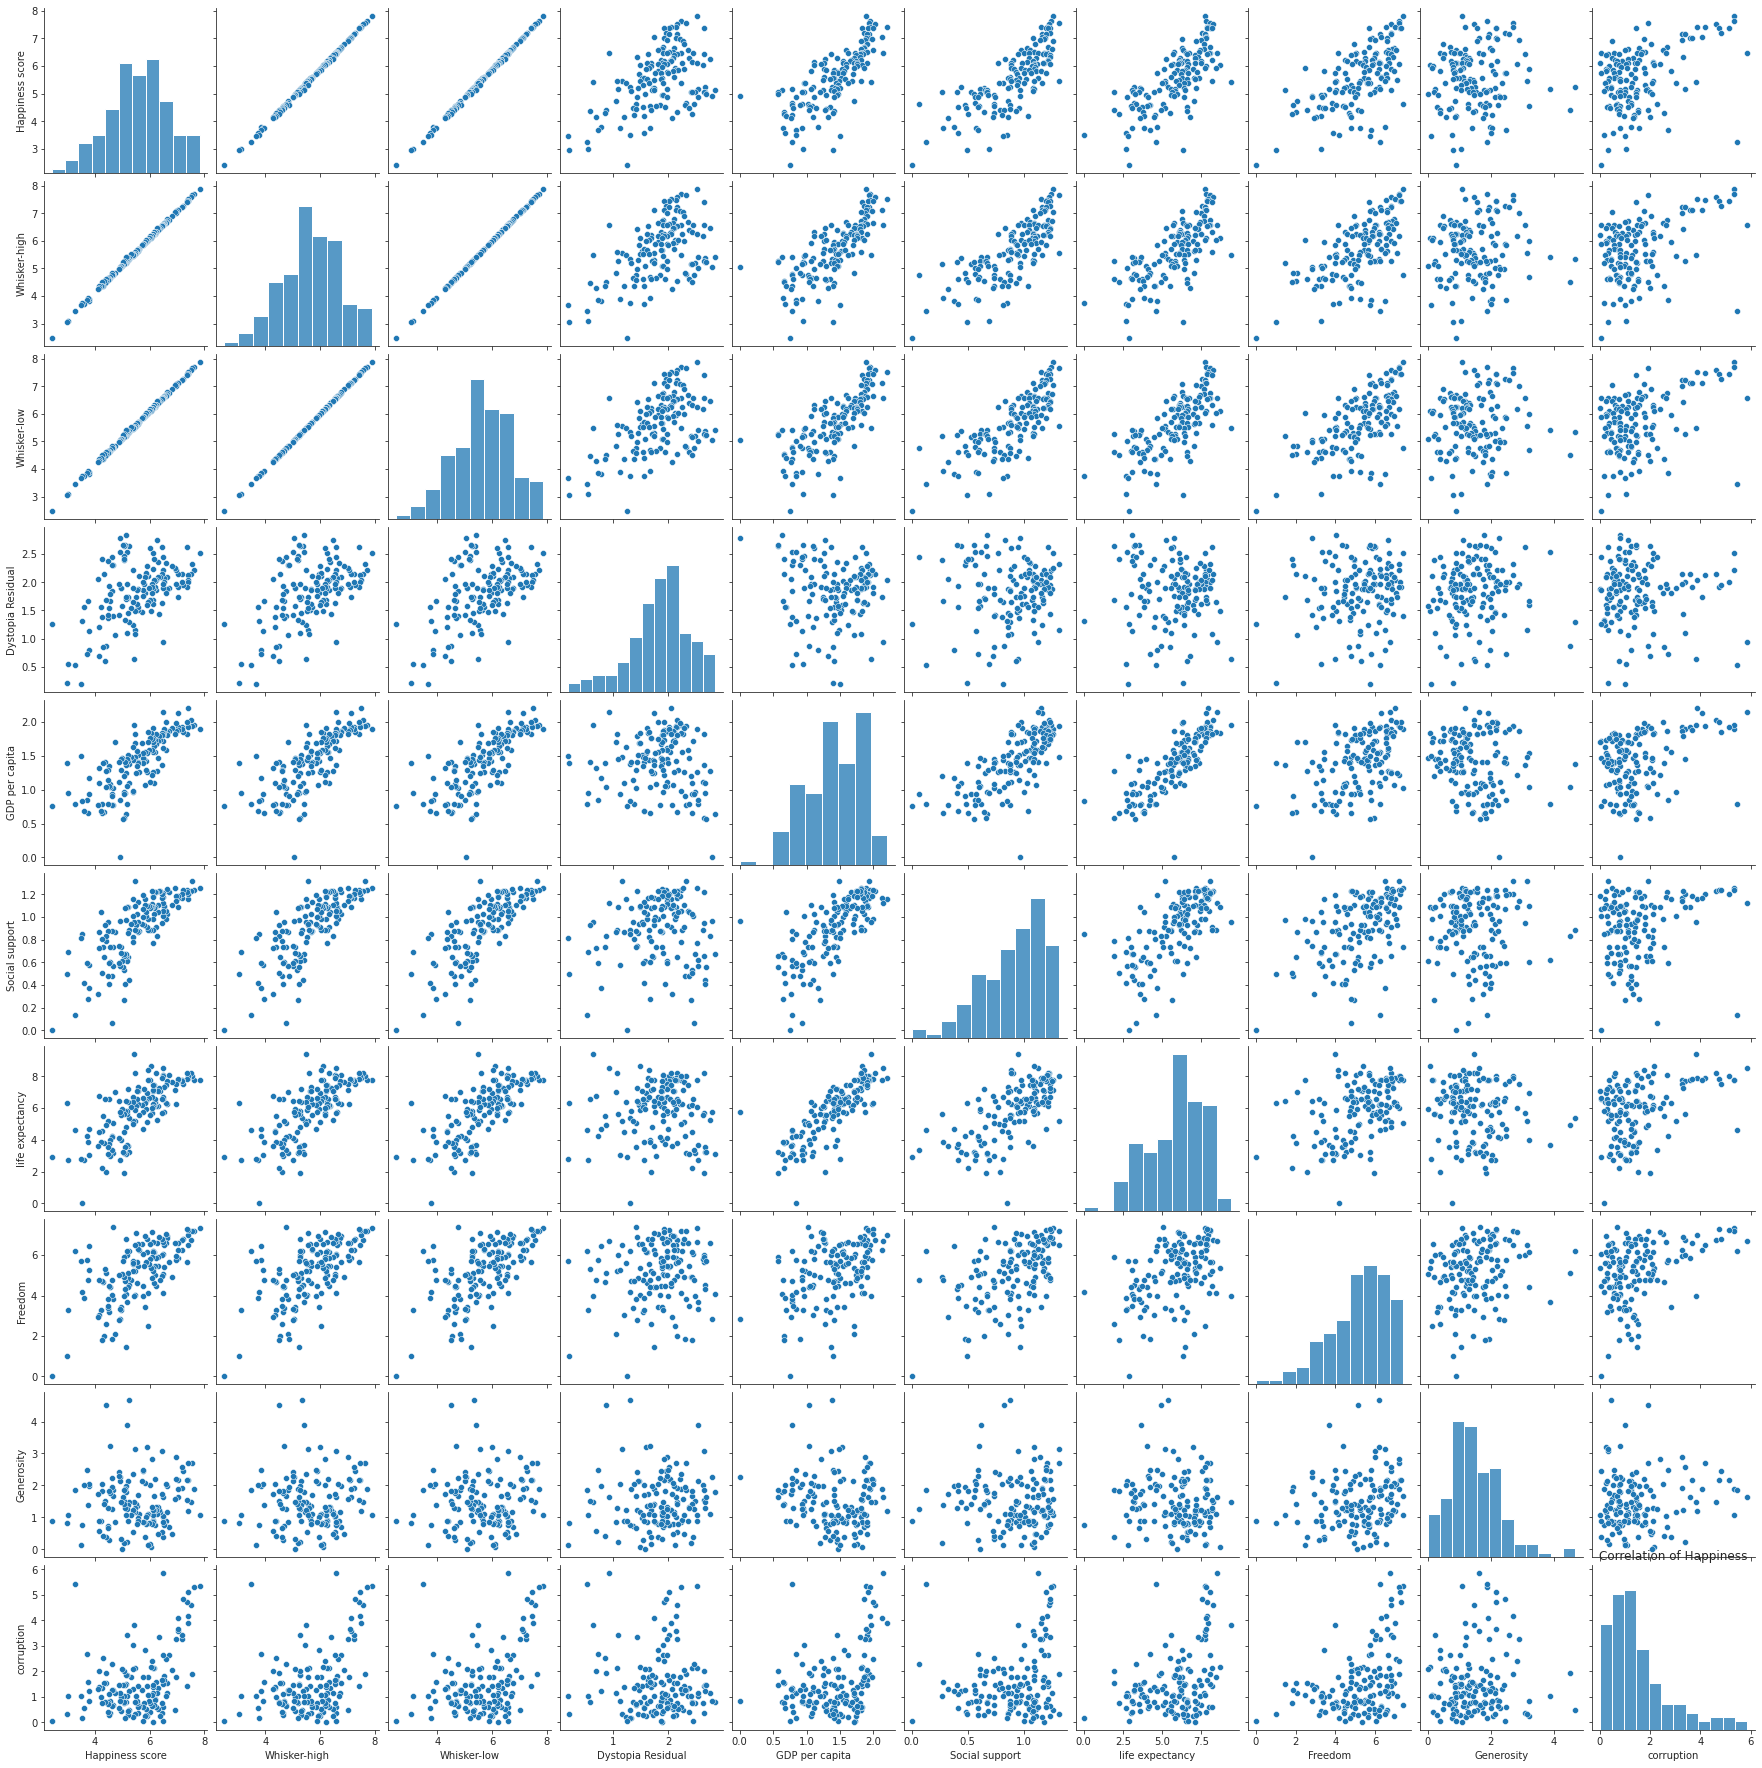

In [87]:
sns.pairplot(df_2022)
plt.title("Correlation of Happiness")
plt.show()


**y와 Whisker-high/low 간 관계도 파악**
- 강한 상관관계를 보이는 것을 볼 수 있다.

<Figure size 432x288 with 0 Axes>

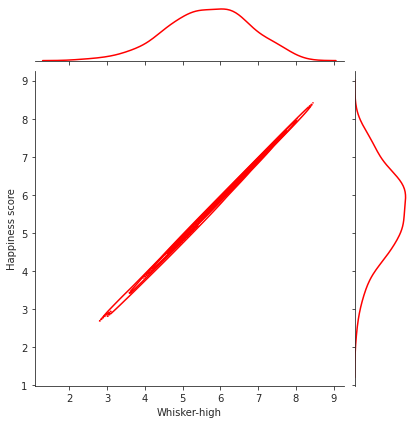

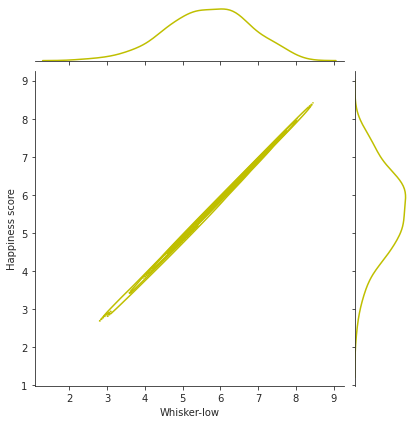

In [88]:
fig = plt.figure()

sns.set_style('ticks')


sns.jointplot(x='Whisker-high', y='Happiness score', data=df_2022, color='r',kind='kde')
sns.jointplot(x='Whisker-low', y='Happiness score', data=df_2022, color='y',kind='kde')


**y와 Dystopia**
- 높은 상관도를 띄고 있는 듯 하다.
- 양의 상관도를 띄고 있는게 의아하다.

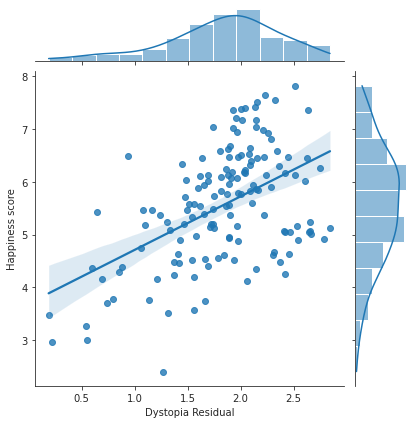

In [89]:
sns.jointplot(x='Dystopia Residual', y='Happiness score', data=df_2022, kind='reg')

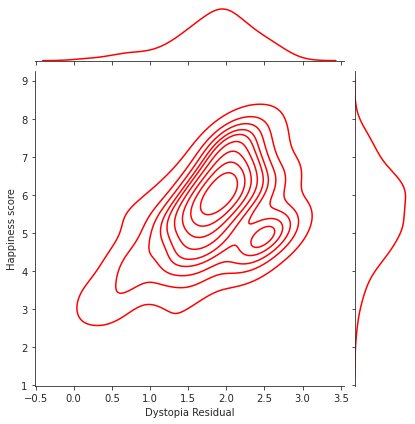

In [90]:
sns.jointplot(x='Dystopia Residual', y='Happiness score', data=df_2022, color='r',kind='kde')

**y와 GDP/Social support 상관관계**
- 경제적인 여유와 사회적 지원이 행복 점수에 미치는 영향에 대해 알아보았다.
- 둘 다 강한 상관 관계를 띄고 있다.
- 돈이나 사회적 지원이 많으면 그만큼 행복도도 올라가는 것 같다.
- 역시 돈인가..


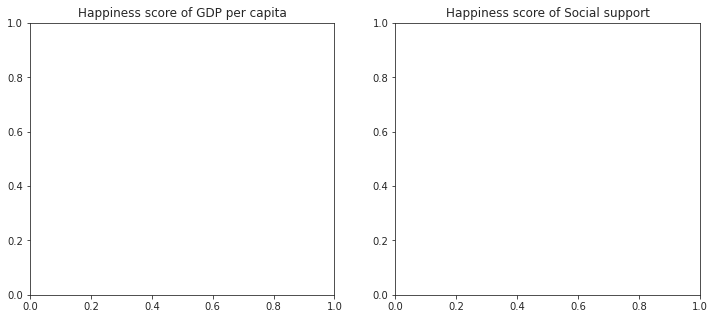

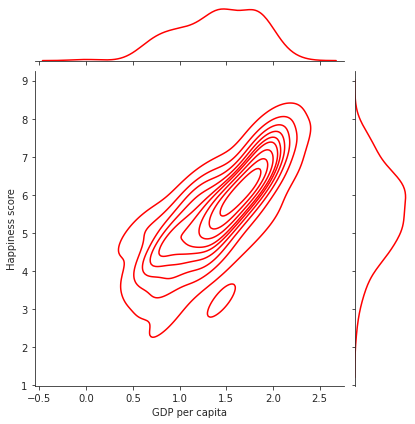

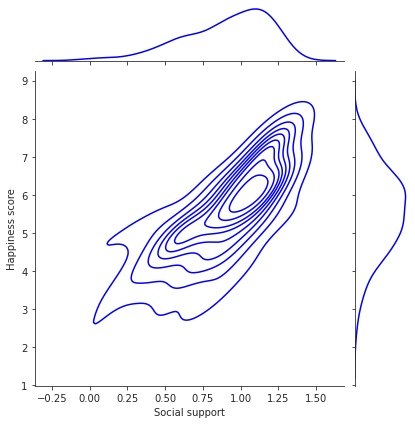

In [91]:
f= plt.figure(figsize=(12,5))

# 첫번째 차트 GDP per capita
ax = f.add_subplot(121)
sns.jointplot(x='GDP per capita', y='Happiness score', data=df_2022, color='r',kind='kde',ax=ax)
ax.set_title('Happiness score of GDP per capita')



# 두번째 차트 Social support
ax = f.add_subplot(122)
sns.jointplot(x='Social support', y='Happiness score', data=df_2022, color='b',kind='kde',ax=ax)
ax.set_title('Happiness score of Social support')


plt.show()



**y와 life expectancy/Freedom/Generosity 상관관계**
1. 건강 기대수명에 따른 행복 점수 상관도가 높다!
 - 건강에 대한 기대치가 높아질수록 행복해지건 다들 똑같은 것같다.
2. 자유에 따른 행복 점수 상관도?
 - 자유에 따라 느끼는 행복 점수는 너무 분산되어 있다. 
 - 이는 부유한 국가에서는 자유에 대해 긍정적이나, 가난한 국가에서는 부정적인 면이 있는 것 같다. 
3. 관대함에 따른 행복 점수 상관도는 낮다.
 - 너그러움이 많다고 해서 행복하진 않은 것 같다.

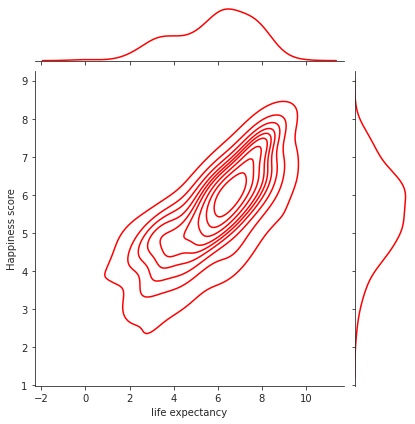

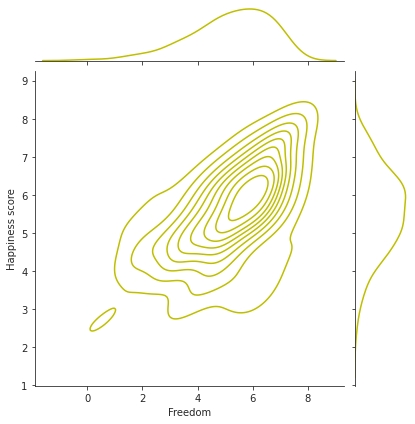

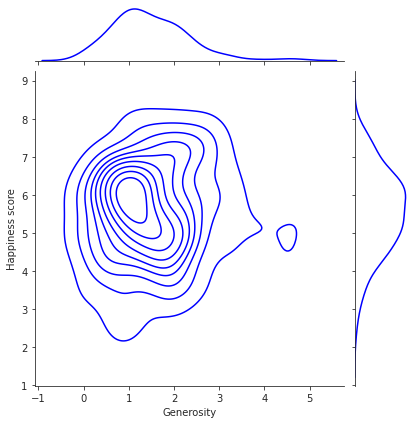

In [92]:
sns.jointplot(x='life expectancy', y='Happiness score', data=df_2022, color='r',kind='kde')
sns.jointplot(x='Freedom', y='Happiness score', data=df_2022, color='y',kind='kde')
sns.jointplot(x='Generosity', y='Happiness score', data=df_2022, color='b',kind='kde')

**y와 corruption에 따른 상관관계**
- 정부 부패에 따른 행복 점수 상관도는 높지 않다.

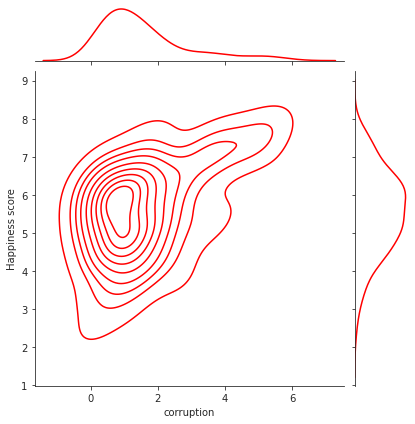

In [93]:
sns.jointplot(x='corruption', y='Happiness score', data=df_2022, color='r',kind='kde')

**HeatMap으로 상관도 수치화**

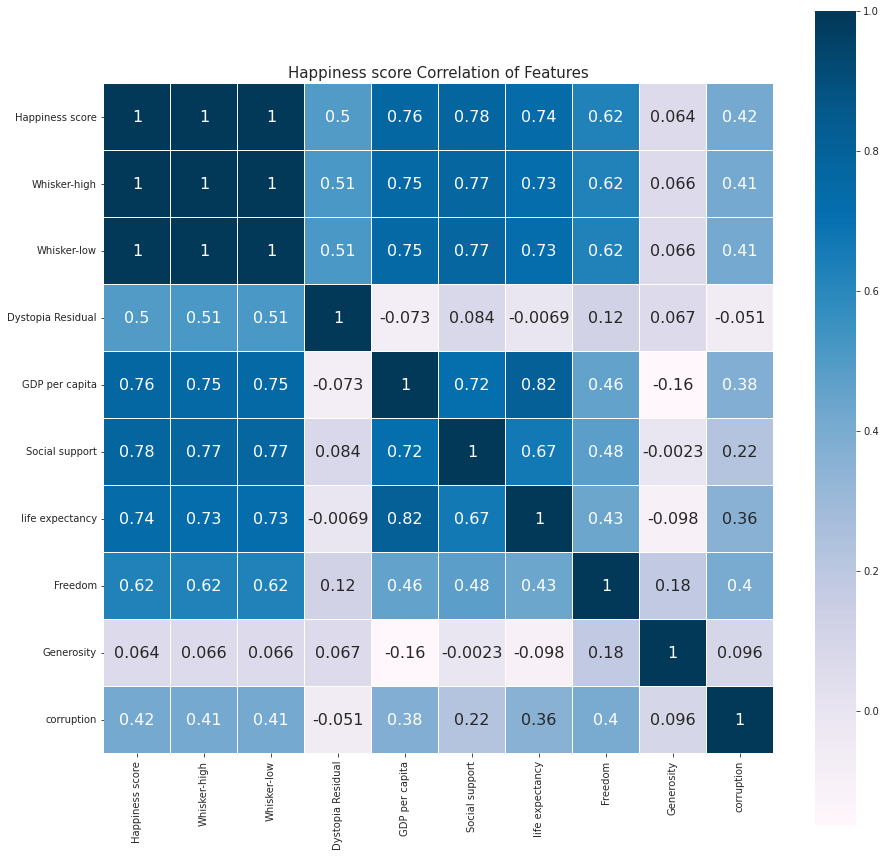

In [94]:
colormap = plt.cm.PuBu
plt.figure(figsize=(15, 15))
plt.title("Happiness score Correlation of Features", y=1.0, size = 15)
sns.heatmap(df_2022.corr(), linewidths=0.1, vmax=1.0, square =True, cmap= colormap, linecolor="white", annot=True, annot_kws={"size":16})


- Happiness score와 높은상관관계를 갖는 feature들은 whisker-high,whisker-low,gdp per capita, social support,life expectancy가 있다.
- Dystopia Residual/Freedom/Generosity/corruption은 기준점 0.7보다 낮으므로 삭제 대상으로 일단 생각만!.


**VIF CHECK**
- VIF CHECK를 통한 다중공선성 제거


In [95]:
df=df_2022.drop(columns=['Country','Happiness score'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Whisker-high       146 non-null    float64
 1   Whisker-low        146 non-null    float64
 2   Dystopia Residual  146 non-null    float64
 3   GDP per capita     146 non-null    float64
 4   Social support     146 non-null    float64
 5   life expectancy    146 non-null    float64
 6   Freedom            146 non-null    float64
 7   Generosity         146 non-null    float64
 8   corruption         146 non-null    float64
dtypes: float64(9)
memory usage: 11.4 KB


In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(df):
  vif=pd.DataFrame()
  vif['VIF_Factor']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['Feature']=df.columns
  return vif

vif=feature_engineering_XbyVIF(df)
print(vif)

    VIF_Factor            Feature
0          inf       Whisker-high
1          inf        Whisker-low
2  1599.083412  Dystopia Residual
3   927.177032     GDP per capita
4   380.360367     Social support
5   167.248002    life expectancy
6   148.442385            Freedom
7    18.412191         Generosity
8    18.100241         corruption


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


- VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸것
- 다른 변수에 의존적일수록 VIF값이 커진다.
- 가장 의존적으로 보이는 Dystopia Residual/GDP per capita를 제거한다.

In [98]:
df_2022 = df_2022.drop(['Dystopia Residual','GDP per capita'], axis=1)
df_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Social support,life expectancy,Freedom,Generosity,corruption
0,Finland,7.821,7.886,7.886,1.258,7.75,7.36,1.09,5.34
1,Denmark,7.636,7.710,7.710,1.243,7.77,7.19,1.88,5.32
2,Iceland,7.557,7.651,7.651,1.320,8.03,7.18,2.70,1.91
3,Switzerland,7.512,7.586,7.586,1.226,8.22,6.77,1.47,4.61
4,Netherlands,7.415,7.471,7.471,1.206,7.87,6.51,2.71,4.19


In [100]:
df2= df_2022.drop(columns=['Country', 'Happiness score'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Whisker-high     146 non-null    float64
 1   Whisker-low      146 non-null    float64
 2   Social support   146 non-null    float64
 3   life expectancy  146 non-null    float64
 4   Freedom          146 non-null    float64
 5   Generosity       146 non-null    float64
 6   corruption       146 non-null    float64
dtypes: float64(7)
memory usage: 9.1 KB


In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(df2):
  vif=pd.DataFrame()
  vif['VIF_Factor']=[variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
  vif['Feature']=df2.columns
  return vif

vif=feature_engineering_XbyVIF(df2)
print(vif)

   VIF_Factor          Feature
0         inf     Whisker-high
1         inf      Whisker-low
2   29.833127   Social support
3   29.262986  life expectancy
4   23.914316          Freedom
5    4.341367       Generosity
6    3.114097       corruption


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


- 가장 높은 상관도를 띄던 변수들을 제거하고 나니 확실히 다중공선성이 줄어들었음을 확인할 수 있었다.
- Social support, life expectancy, Freedom 모두 여전히 10이상이지만 제거해버리면 변수가 너무 적으므로 나둔다.

**sklearn r2_score로 결정계수 확인하기**
- Polynimial Featyre 활용한 LinearRegression이 더 높은 성능을 보였다.

In [107]:
df_train, df_test = train_test_split(df_2022, test_size=0.3)

In [108]:
train_x=df_train.drop(columns=['Country','Happiness score'])
train_y=df_train['Happiness score']

test_x=df_test.drop(columns=['Country','Happiness score'])
test_y=df_test['Happiness score']

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)


################ 단순 LinearRegression ################
lr = LinearRegression()
lr.fit(train_x, train_y)

r2 = r2_score(lr.predict(test_x), test_y)

print("df.shape", df.shape, "r2_score", r2, "adj_r2_score", adj_r2(r2, test_x.shape[0], test_x.shape[1]))



df.shape (146, 9) r2_score 0.9991451358658938 adj_r2_score 0.998978912284262


In [114]:
################ PolynimialFeature 활용 ################
df_2 = df_2022.drop(['Country'],axis=1)
df2 = PolynomialFeatures().fit_transform(df_2)
df_train, df_test = train_test_split(df_2, test_size=0.3)

train_x=df_train.drop(columns=['Happiness score'])
train_y=df_train['Happiness score']

test_x=df_test.drop(columns=['Happiness score'])
test_y=df_test['Happiness score']

lr = LinearRegression()
lr.fit(train_x, train_y)

r2 = r2_score(lr.predict(test_x), test_y)

print("df.shape", df2.shape, "r2_score", r2, "adj_r2_score", adj_r2(r2, test_x.shape[0], test_x.shape[1]))

df.shape (146, 45) r2_score 0.9991777295574775 adj_r2_score 0.9990178436380982
